In [ ]:
class Financeira:

  import pandas as pd
  import numpy as np

  import seaborn as sns
  import matplotlib.pyplot as plt  

  def financiamento( i_ano: float, tempo: int, financiamento: float, acrescimo_amortizacao: float ):
    import pandas as pd
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    import numpy as np    
    import matplotlib.pyplot as plt    

    # Verifica a validade dos dados inseridos na funcao
    if i_ano < 0 or tempo < 0 or financiamento < 0 or acrescimo_amortizacao < 0:
      print('Dados invalidos')
      return None
    
    else:
      # Conversao da taxa anual para taxa mensal
      i_ano = i_ano/100
      i_mes = pow(1+i_ano, 1/12)-1

      # Nesta etapa, eh calculado o coeficiente de financiamento, que determina o valor de cada parcela
      # Para determinar o valor de cada parcela, o CIF eh multiplicado pelo valor total do financiamento

      # Por exemplo, para um financiamento de 240 meses, com taxa mensal de 1% e valor total de R$ 100.000,00
      # O CIF eh igual a 0.01101 e o valor da parcela eh de R$ 1101,00     
      cif = i_mes / (1 - (1 / pow(1 + i_mes, tempo)) )

      # Nesta etapa, eh calculado o valor da parcela e o saldo devedor eh igualado ao valor total do financiamento
      parcela = cif * financiamento

      saldo_devedor = financiamento       

      # Criacao de listas para auxiliar a criacao do dataframe com os dados do pagamento do financiamento
      lista_juros = []

      lista_amortizacao = []

      soma_amortizacao = 0 
      lista_soma_amortizacao = []

      lista_saldo_devedor = [saldo_devedor]

      soma_juros = 0
      lista_soma_juros = []

      lista_parcelas = []

      # A partir do laco 'while' sao calculados os juros e o valor da amortizacao do mes
      while True:      
        # calculo do juros
        juros = i_mes * saldo_devedor
        # calculo da amortizacao  
        amortizacao = parcela - juros + acrescimo_amortizacao
        
        # soma do quanto jah foi amortizado e do quanto jah foi pago de juros
        soma_amortizacao += amortizacao  
        soma_juros += juros
        saldo_devedor -= amortizacao
        parcela = round(financiamento * cif, 2)

        # caso o saldo devedor ainda seja maior que zero, sao acrescidos os valores nas listas
        # e o laco 'while' continua sendo executado
        if saldo_devedor >= 0 or soma_amortizacao <= financiamento:
          lista_juros.append(round(juros, 2))
          lista_soma_juros.append(round(soma_juros, 2))
          lista_amortizacao.append(round(amortizacao, 2))
          lista_soma_amortizacao.append(round(soma_amortizacao, 2))
          lista_saldo_devedor.append(round(saldo_devedor, 2))
          lista_parcelas.append(parcela)

        # caso o saldo devedor seja menor que zero, sao acrescidos os valores nas listas
        # e o laco 'while' continua eh interrompido
        # por fim, eh retornado um dataframe com os dados do financiamento
        else:
          lista_juros.append(round(juros, 2))
          lista_soma_juros.append(round(soma_juros, 2))

          # calculo da ultima amortizacao
          amortizacao = amortizacao - (soma_amortizacao - financiamento)    
          lista_amortizacao.append(round(amortizacao, 2))

          soma_amortizacao = financiamento
          lista_soma_amortizacao.append(round(soma_amortizacao, 2))
          lista_saldo_devedor.append(round(saldo_devedor, 2))

          parcela = juros + amortizacao
          parcela = round(parcela, 2)
          lista_parcelas.append(parcela)

          # cria um dataframe utilizando as listas que foram criadas
          df = pd.DataFrame(list(zip(lista_juros, lista_soma_juros, lista_amortizacao, lista_soma_amortizacao, lista_saldo_devedor, lista_parcelas)), 
                            columns = ['juros', 'soma_juros', "amortizacao", "soma_amortizacao", "saldo_devedor", "parcelas"])
          return df         
          break

  def investimento(aporte, tempo, taxa_mes):
    import pandas as pd
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    import matplotlib.pyplot as plt

    # Verifica a validade dos dados inseridos na funcao
    if aporte <= 0 or tempo < 0 or taxa_mes < 0:
      print('Dados invalidos')
      return None

    else:
      counter = 1
      montante = aporte
      lista_soma_juros = [0]
      lista_juros_mes = [0]
      lista_soma_aporte = [aporte]
      lista_montante = [montante]    

      while counter < tempo:
        # Calcula o montante acumulado
        montante = montante * (1 + taxa_mes/100) + aporte
        lista_montante.append(montante)

        # Calcula o total aportado
        aporte_total = (counter + 1) * aporte
        lista_soma_aporte.append(aporte_total)

        # Calcula o juros acumulado sobre o investimento
        soma_juros = montante - aporte * ( 1 + counter )
        lista_soma_juros.append( soma_juros )

        # Calcula o juros mensal sobre o investimento
        juros_mes = lista_soma_juros[-1] - lista_soma_juros[-2]
        lista_juros_mes.append(juros_mes)
        counter += 1

      df = pd.DataFrame(list(zip(lista_montante, lista_soma_juros, lista_juros_mes, lista_soma_aporte)), 
                              columns = ["montante", "soma_juros", "juros_mes", "soma_aporte"])
            
      return df

In [ ]:
calc = Financeira()

In [ ]:
df = calc.financiamento( i_ano=10, tempo=240, financiamento=300000, acrescimo_amortizacao=0 )
df1 = calc.financiamento( i_ano=10, tempo=240, financiamento=300000, acrescimo_amortizacao=100 )
df2 = calc.financiamento( i_ano=10, tempo=240, financiamento=300000, acrescimo_amortizacao=250 )
df3 = calc.financiamento( i_ano=10, tempo=240, financiamento=300000, acrescimo_amortizacao=500 )
df4 = calc.financiamento( i_ano=10, tempo=240, financiamento=300000, acrescimo_amortizacao=750 )
df5 = calc.financiamento( i_ano=10, tempo=240, financiamento=300000, acrescimo_amortizacao=1000 )

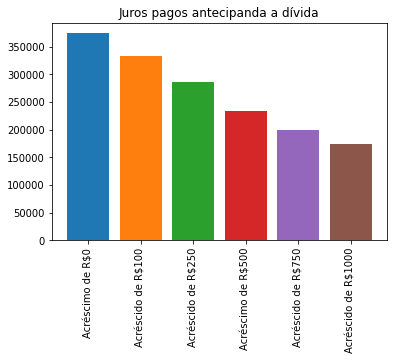

In [ ]:
import matplotlib.pyplot as plt


plt.bar(height = df['soma_juros'], x='Acréscimo de R$0')
plt.bar(height = df1['soma_juros'], x='Acréscido de R$100')
plt.bar(height = df2['soma_juros'], x='Acréscido de R$250')
plt.bar(height = df3['soma_juros'], x='Acréscimo de R$500')
plt.bar(height = df4['soma_juros'], x='Acréscido de R$750')
plt.bar(height = df5['soma_juros'], x='Acréscido de R$1000');
plt.title('Juros pagos antecipanda a dívida')
plt.xticks(rotation=90);

plt.savefig('montante_emprestimo.jpeg', bbox_inches='tight')

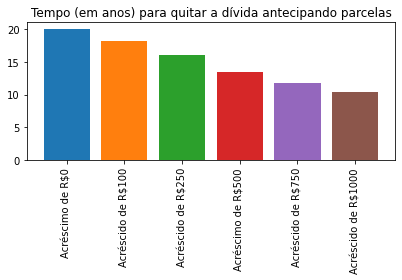

In [ ]:
plt.bar(height = len(df)/12, x='Acréscimo de R$0')
plt.bar(height = len(df1)/12, x='Acréscido de R$100')
plt.bar(height = len(df2)/12, x='Acréscido de R$250')
plt.bar(height = len(df3)/12, x='Acréscimo de R$500')
plt.bar(height = len(df4)/12, x='Acréscido de R$750')
plt.bar(height = len(df5)/12, x='Acréscido de R$1000');
plt.xticks(rotation=90);
plt.title('Tempo (em anos) para quitar a dívida antecipando parcelas')
plt.tight_layout()
plt.savefig('tempo_emprestimo.jpeg', bbox_inches='tight')